# Corpus Analysis

## Corpus Business Scene Dialogue

https://paperswithcode.com/dataset/business-scene-dialogue

Corpus parallèle anglais-japonais contenant des dialogues issus de différents scénarios commerciaux.

In [1]:
!git clone https://github.com/tsuruoka-lab/BSD.git

Cloning into 'BSD'...


In [7]:
corpus_path = {
    "train": "./BSD/train.json",
    "dev": "./BSD/dev.json",
    "test": "./BSD/test.json"
}

###  Type de Données / Taille

In [8]:
import os
import mimetypes

def get_file_info(file_path):
    file_size_bytes = os.path.getsize(file_path)
    # 1 mb = 1024² bytes
    file_size_mb = file_size_bytes / (1024 * 1024)

    # MIME type
    file_type, _ = mimetypes.guess_type(file_path)

    print(f"File type: {file_type}")
    print(f"File size: {file_size_mb:.2f} MB")

    return file_type, file_size_mb


for split in corpus_path.keys():
    file_path = corpus_path[split]
    get_file_info(file_path)


File type: application/json
File size: 6.57 MB
File type: application/json
File size: 0.67 MB
File type: application/json
File size: 0.69 MB


In [9]:
from datasets import load_dataset

dataset = load_dataset("json", data_files=corpus_path)

dataset

DatasetDict({
    train: Dataset({
        features: ['tag', 'title', 'id', 'conversation', 'original_language'],
        num_rows: 670
    })
    dev: Dataset({
        features: ['tag', 'title', 'id', 'conversation', 'original_language'],
        num_rows: 69
    })
    test: Dataset({
        features: ['tag', 'title', 'id', 'conversation', 'original_language'],
        num_rows: 69
    })
})

In [10]:
dataset["train"][0]

{'tag': 'phone call',
 'title': '伝言への折り返し電話\u3000打ち合わせ日程調整',
 'id': '190329_J07_03',
 'conversation': [{'en_sentence': 'Hi this is the systems development department of Company K.',
   'en_speaker': 'Doi-san',
   'ja_sentence': 'はい、K社システム開発部です。',
   'ja_speaker': '土井さん',
   'no': 1},
  {'en_sentence': 'My name is Takaichi from Company H.',
   'en_speaker': 'Takaichi-san',
   'ja_sentence': 'H社の高市と申します。',
   'ja_speaker': '高市さん',
   'no': 2},
  {'en_sentence': 'Thank you as always.',
   'en_speaker': 'Takaichi-san',
   'ja_sentence': 'いつもお世話になっております。',
   'ja_speaker': '高市さん',
   'no': 3},
  {'en_sentence': 'Thank you as always as well.',
   'en_speaker': 'Doi-san',
   'ja_sentence': 'こちらこそ、お世話になっております。',
   'ja_speaker': '土井さん',
   'no': 4},
  {'en_sentence': 'Is Inada-san there?',
   'en_speaker': 'Takaichi-san',
   'ja_sentence': '稲田さんはいらっしゃいますか？',
   'ja_speaker': '高市さん',
   'no': 5},
  {'en_sentence': 'It seems I got a call from him around 1 hour ago.',
   'en_speaker': 'Takaichi-s

Il a été observé que le corpus ne contient pas de prétraitement tel que la **tokenisation**, la **lemmatisation** ou la **suppression des stopwords**.

## Description Statistique
### Distribution des Classes

In [12]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

def draw_tag_distribution(split, count_by):
    tag_counts = Counter()
    for item in dataset[split]:
        tag = item["tag"]
        language = item["original_language"]
        # Count the number of sentences in the conversation
        tag_counts[(tag, language)] += len(item["conversation"]) if count_by == "sentence" else 1

    tags = list(set(tag for tag, _ in tag_counts.keys()))
    ja_counts = [tag_counts.get((tag, "ja"), 0) for tag in tags]
    en_counts = [tag_counts.get((tag, "en"), 0) for tag in tags]

    # plotting
    bar_width = 0.35
    x = np.arange(len(tags))

    plt.figure(figsize=(12, 6))
    bars1 = plt.bar(x - bar_width/2, ja_counts, width=bar_width, label="ja", color="pink")
    bars2 = plt.bar(x + bar_width/2, en_counts, width=bar_width, label="en", color="skyblue")

    plt.xlabel("Tags") 
    plt.ylabel("Sentences" if count_by == "sentence" else "Scenarios")
    plt.title("Tag Distribution by Language (Sentence) - " + split)
    plt.xticks(x, tags, rotation=45)
    plt.legend(title="Original Language")

    # Add data labels above each bar
    for bars in (bars1, bars2):
        for bar in bars:
            plt.text(
                bar.get_x() + bar.get_width() / 2, # x position
                bar.get_height() + 0.2, # y position
                str(int(bar.get_height())), # data label
                ha='center', # horizontal alignment
                va='bottom' # vertical alignment
            )

    plt.tight_layout()
    plt.show()

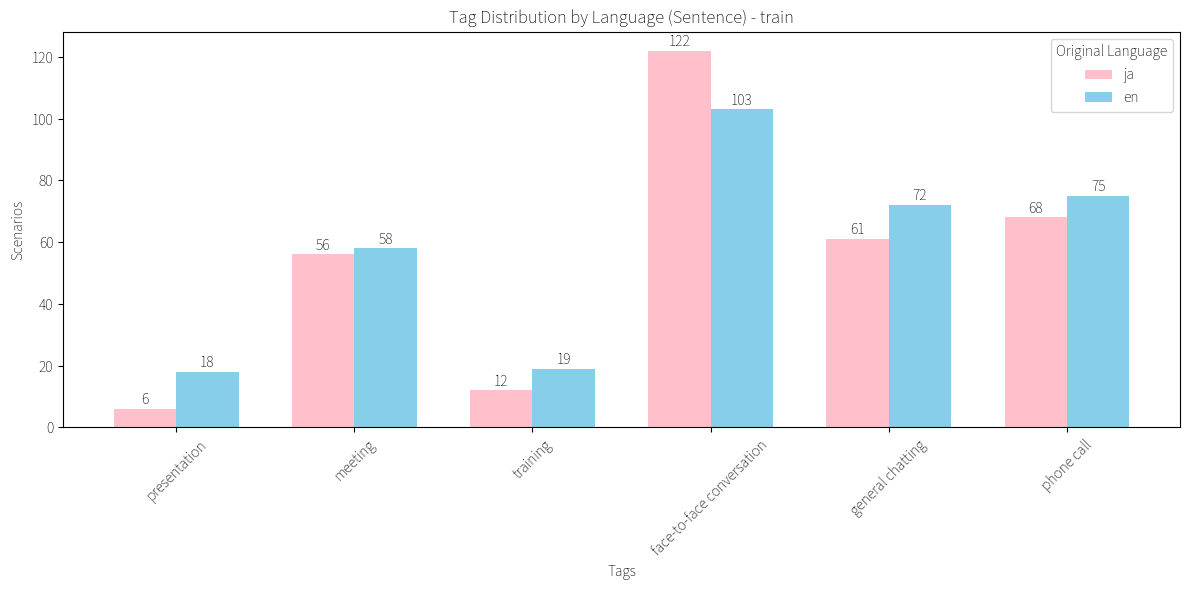

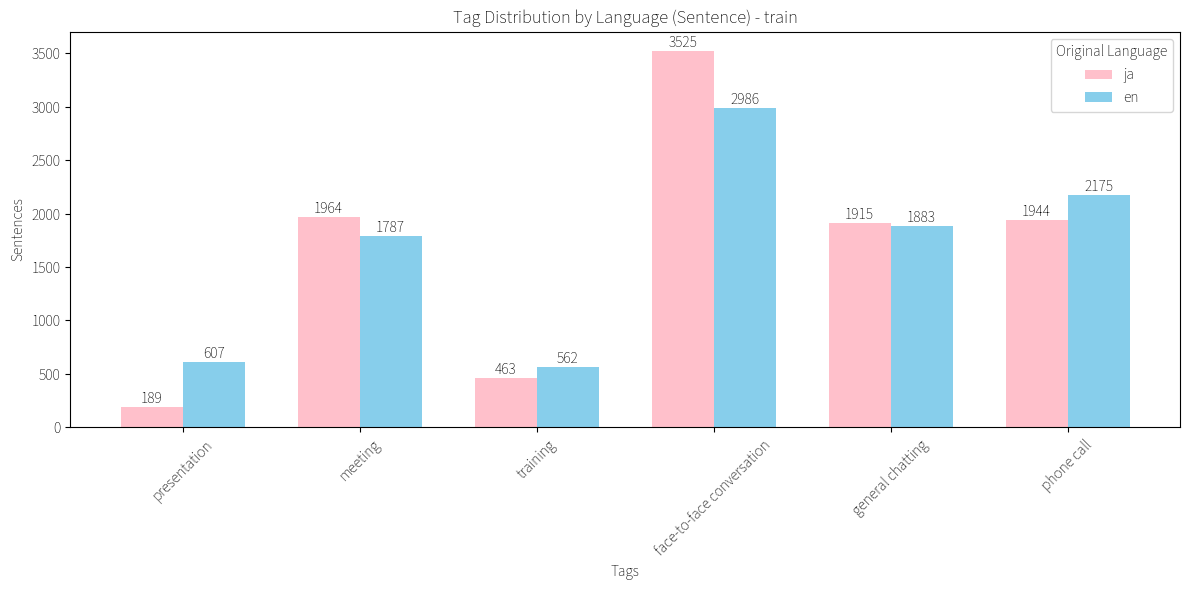

In [36]:
draw_tag_distribution("train", "scenario")
draw_tag_distribution("train", "sentence")

Dans ces deux graphiques, on peut observer des différences de distribution entre le japonais (ja) et l'anglais (en) dans différents types de dialogues (tags).

1. **Le premier graphique** montre le nombre de scénarios pour chaque type de dialogue. On peut voir que la répartition entre le japonais et l'anglais est relativement similaire pour la plupart des tags, notamment pour "meeting" et "phone call". Cependant, pour le tag "face-to-face conversation", le nombre de scénarios en japonais est nettement plus élevé que celui en anglais, ce qui indique une plus grande utilisation du japonais dans ce type de dialogue.

2. **Le deuxième graphique** montre le nombre de phrases dans chaque type de dialogue. On remarque que, pour le tag "face-to-face conversation", le nombre de phrases en japonais est significativement plus élevé que celui en anglais, ce qui renforce l'observation selon laquelle le japonais est plus fréquemment utilisé dans ce contexte. Par ailleurs, pour les autres types de dialogue, le nombre de phrases en japonais et en anglais est relativement proche, ce qui peut indiquer que les modes de communication ou la structure des dialogues sont similaires dans ces contextes.

**Conclusion** : Dans l'ensemble, la répartition des scénarios et des phrases par type de dialogue est assez similaire entre le japonais et l'anglais, mais il existe quelques différences marquées, notamment dans le cas des conversations en face-à-face, où l'utilisation du japonais est plus fréquente. Cela peut refléter une préférence pour l'utilisation du japonais dans certaines situations spécifiques dans le corpus.

### Fréquence des Mots

In [13]:
import matplotlib.font_manager as fm
# Default font in matplotlib does not support Hiragana/Katakana/Kanji
font_path = "Noto_Sans_JP/NotoSansJP-VariableFont_wght.ttf"

# Add the font to matplotlib
fm.fontManager.addfont(font_path)
plt.rcParams['font.family'] = fm.FontProperties(fname=font_path).get_name()

https://www.kaggle.com/datasets/lazon282/japanese-stop-words

https://countwordsfree.com/stopwords/japanese

https://github.com/stopwords-iso/stopwords-ja

https://github.com/stopwords/japanese-stopwords

https://github.com/6/stopwords-json/blob/master/dist/ja.json

In [43]:
import nltk
nltk.download("stopwords")

from nltk.corpus import stopwords

en_stopwords = set(stopwords.words('english'))

ja_stopwords = set()

import os
import json

directory = "./JP_stopwords"

for filename in os.listdir(directory):
    if filename.endswith('.txt'):
        file_path = os.path.join(directory, filename)
        with open(file_path, 'r', encoding='utf-8') as file:
            for line in file:
                ja_stopwords.add(line.strip())
    elif filename.endswith('.json'):
        file_path = os.path.join(directory, filename)
        with open(file_path, 'r', encoding='utf-8') as file:
            data = json.load(file)
            for word in data:
                ja_stopwords.add(word)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
import string

fullwidth_punctuation = "、。！？：；「」『』（）［］｛｝〜"

punctuation = string.punctuation + fullwidth_punctuation

In [45]:
from transformers import AutoTokenizer

en_tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
ja_tokenizer = AutoTokenizer.from_pretrained("cl-tohoku/bert-base-japanese")

def draw_word_frequency(split):
    en_counter = Counter()
    ja_counter = Counter()

    for item in dataset[split]:
        for turn in item["conversation"]:
            en_tokens = en_tokenizer.tokenize(turn['en_sentence'].lower())
            en_tokens = [token for token in en_tokens if token not in en_stopwords and token not in punctuation and '#' not in token]
            en_counter.update(en_tokens)
            
            ja_tokens = ja_tokenizer.tokenize(turn['ja_sentence'])
            ja_tokens = [token for token in ja_tokens if token not in ja_stopwords and token not in punctuation and '#' not in token]
            ja_counter.update(ja_tokens)

    print("Top 10 English words:", en_counter.most_common(10))
    print("Top 10 Japanese words:", ja_counter.most_common(10))

    en_words, en_counts = zip(*en_counter.most_common(10))
    ja_words, ja_counts = zip(*ja_counter.most_common(10))

    # Plot English word frequencies
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
    plt.bar(en_words, en_counts, color='skyblue')
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.title("Top 10 English Words Frequency - " + split)
    plt.xticks(rotation=45)

    # Plot Japanese word frequencies
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
    plt.bar(ja_words, ja_counts, color='pink')
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.title("Top 10 Japanese Words Frequency - " + split)
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

Top 10 English words: [('company', 1045), ('yes', 830), ('like', 813), ('thank', 770), ('would', 733), ('right', 704), ('think', 688), ('know', 679), ('good', 665), ('well', 664)]
Top 10 Japanese words: [('いい', 994), ('はい', 808), ('どう', 772), ('社', 749), ('ありがとう', 584), ('けど', 569), ('いただ', 552), ('ください', 537), ('思い', 528), ('つい', 496)]


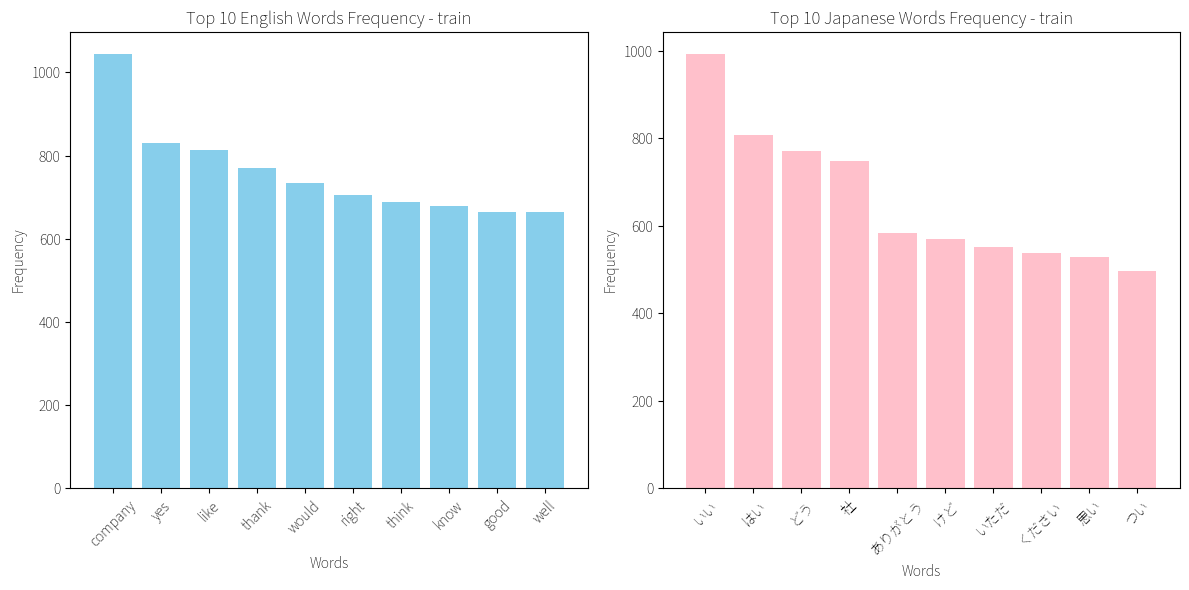

In [46]:
draw_word_frequency("train")

Dans ce corpus parallèle, les résultats de la fréquence des mots en anglais et en japonais révèlent certains aspects intéressants :

1. **Expressions courantes** : Les deux langues incluent des mots fréquemment utilisés dans la communication. Par exemple, en anglais, on retrouve "yes" (oui) et "thank" (merci), tandis qu’en japonais, "はい" (oui) et "ありがとう" (merci) apparaissent parmi les mots les plus fréquents, ce qui montre leur omniprésence dans les conversations.

2. **Expression des émotions et des attitudes** : En anglais, on voit des mots comme "like" (aimer) et "good" (bien), tandis qu’en japonais, on trouve "いい" (bien) et "思い" (pensée). Ces mots reflètent l’expression des émotions ou des opinions, fréquente dans les conversations quotidiennes.

3. **Particles et mots d’attitude** : Dans le corpus japonais, des particules ou mots d’attitude comme "けど" (mais) et "つい" (juste, involontairement) sont présents. Cela montre l’importance de l'expression de l’attitude dans le japonais conversationnel, alors qu'en anglais, il n’y a pas d’équivalents directs parmi les mots fréquents. Cela pourrait indiquer une différence structurelle ou d’habitudes d'expression entre les deux langues.

4. **Vocabulaire lié aux entreprises** : En anglais, le mot "company" (entreprise) est le plus fréquent, et en japonais, "社" (entreprise) apparaît également. Cela suggère que ce corpus contient de nombreux dialogues portant sur des situations professionnelles ou commerciales.

En résumé, ces mots fréquents reflètent les expressions courantes en anglais et en japonais dans la communication quotidienne et dans les contextes professionnels, avec toutefois des différences dans l’usage des particules et dans l’expression des émotions.

### longueur Moyenne des Documents

In [52]:
import numpy as np

def get_avg_length(split):
    len_sentences_en = []
    len_sentences_ja = []

    for item in dataset[split]:
        for turn in item["conversation"]:
            len_sentences_en.append(len(en_tokenizer.encode(turn['en_sentence'])))
            len_sentences_ja.append(len(ja_tokenizer.encode(turn['ja_sentence'])))

    avg_len_en = np.mean(len_sentences_en)
    avg_len_ja = np.mean(len_sentences_ja)

    print(f"Average English sentence length: {avg_len_en:.2f}")
    print(f"Average Japanese sentence length: {avg_len_ja:.2f}")

    mdn_len_en = np.median(len_sentences_en)
    mdn_len_ja = np.median(len_sentences_ja)

    print(f"Median English sentence length: {mdn_len_en}")
    print(f"Median Japanese sentence length: {mdn_len_ja}")

    q3_len_en = np.percentile(len_sentences_en, 75)
    q3_len_ja = np.percentile(len_sentences_ja, 75)

    print(f"Q3 English sentence length: {q3_len_en}")
    print(f"Q3 Japanese sentence length: {q3_len_ja}")


In [53]:
get_avg_length("train")

Average English sentence length: 13.68
Average Japanese sentence length: 15.86
Median English sentence length: 13.0
Median Japanese sentence length: 15.0
Q3 English sentence length: 17.0
Q3 Japanese sentence length: 20.0


On peut observer quelques caractéristiques intéressantes dans les données statistiques sur la longueur des phrases du corpus :

1. **Longueur moyenne des phrases** : La longueur moyenne des phrases en japonais (15,86) est nettement supérieure à celle des phrases en anglais (13,68), ce qui indique que l'expression en japonais est généralement plus prolixe, pouvant contenir davantage d'éléments modificateurs ou de structures de politesse.

2. **Médiane et troisième quartile (Q3)** : La médiane des phrases japonaises et le troisième quartile sont respectivement de 15 et 20, qui sont tous deux supérieurs à la médiane de 13 et à la valeur du Q3 de 17 en anglais. Cela démontre encore une fois que la longueur moyenne des phrases japonaises est globalement plus élevée.

3. **Différences structurelles entre les langues** : Ces différences de données peuvent refléter les distinctions dans la structure des phrases entre le japonais et l'anglais. Le japonais utilise souvent des phrases complexes plus longues et un vocabulaire de politesse, surtout dans des contextes formels ou professionnels, tandis que l'anglais tend à privilégier des structures de phrases plus courtes.

4. **Défis potentiels de traduction** : En raison des différences de longueur des phrases, traduire de l'anglais vers le japonais peut nécessiter d'ajouter certains éléments pour maintenir la politesse ou compléter les informations nécessaires, tandis que traduire du japonais vers l'anglais peut nécessiter de simplifier les phrases pour s'adapter aux habitudes d'expression anglaises.

Dans l'ensemble, ces données sur la longueur des phrases reflètent les différences dans la structure syntaxique et le style d'expression entre les deux langues.

## Qualitative
### Exemples Typiques

In [59]:
import random

def get_random_conversation(target_tag, target_language):
    filtered_conversations = [
        entry['conversation'] for entry in dataset['train']
        if entry['tag'] == target_tag and entry['original_language'] == target_language
    ]

    if filtered_conversations:
        random_conversation = random.choice(filtered_conversations)
        return random_conversation
    else:
        raise ValueError("No conversation found with the given tag and language")
    

def print_conversation(conversation):
    for turn in conversation:
        print(f"{turn['en_speaker']}: {turn['en_sentence']}")
        print(f"{turn['ja_speaker']}: {turn['ja_sentence']}")
        print()

print("Random face-to-face conversation original Japanese:")
conversation = get_random_conversation("face-to-face conversation", "ja")
print_conversation(conversation)

print("Random face-to-face conversation original English:")
conversation = get_random_conversation("face-to-face conversation", "en")
print_conversation(conversation)

Random face-to-face conversation original Japanese:
Ms. Takasaka: Hello, My name is Takasaka from A Foods Corporation.
高坂さん: すみません、A食品の高坂と申します。

Ms. Takasaka: Is Mr. Sakata in the sales planning department available?
高坂さん: 営業企画部の坂田さんはいらっしゃいますか？

Ms. Nakamura: Good morning, Ms. Takasaka, do you have an appointment with him?
中村さん: おはようございます、高坂様、お約束はされていますか？

Ms. Takasaka: Yes, at 10 o'clock.
高坂さん: はい、１０時に。

Ms. Nakamura: Please wait a moment while I check his schedule.
中村さん: 只今確認いたしますので、少々お待ち下さい。

Ms. Nakamura: Yes, Ms. Takasaka, from A Foods Corporation, at 10 o'clock today.
中村さん: はい、A食品の高坂様ですね、本日10時で承っております。

Ms. Nakamura: Please go up to Meeting Room 1 on the 24th floor.
中村さん: 24階の会議室１へお願いします。

Ms. Nakamura: Mr. Sakata will be with you shortly.
中村さん: 坂田がすぐにまいります。

Ms. Takasaka: Sure.
高坂さん: わかりました。

Ms. Nakamura: Please use a high-speed elevator on the right at the end of the hallway.
中村さん: 通路奥右側の高層階用エレベーターをご利用下さい。

Ms. Takasaka: Thank you.
高坂さん: ありがとう。

Mr. Sakata: Thank you for waiti

#### Exemple 1 (traduction du japonais à l'anglais) :
- **Contenu** : Lors d'un entretien, le locuteur exprime sa gratitude pour le temps accordé à l'entretien, en soulignant l'importance de la communication en face à face.
- **Caractéristiques** : Format de dialogue, incluant des expressions de politesse et des titres des interlocuteurs (comme "Ms. Toyama" et "Mr. Kishida").
- **Particularités linguistiques** : Utilisation des honorifiques en japonais, reflétant la culture de la politesse et du respect.

#### Exemple 2 (traduction de l'anglais au japonais) :
- **Contenu** : Dans un environnement de travail, le locuteur discute des besoins d'impression de documents de présentation.
- **Caractéristiques** : Dialogue direct, exprimant des besoins spécifiques (comme le nombre de copies, la couleur et la manière de les agrafer).
- **Particularités linguistiques** : Comprend un ton naturel de communication quotidienne, adapté à un environnement de travail informel.

### Difficultés Linguistiques

- **Utilisation des honorifiques et non-honorifiques** :
  - En japonais, l'utilisation des honorifiques est plus complexe et plus courante qu'en anglais. Cela peut poser des défis aux apprenants de japonais dans la compréhension et l'utilisation des honorifiques.
  - Par exemple, dans le premier exemple, “お忙しい中”(prendre du temps sur son emploi du temps chargé) montre le respect du locuteur envers le temps de l’autre, ce qui est plus simple en anglais.

- **Différences de vocabulaire et d'expression** :
  - En anglais, le locuteur peut utiliser des expressions plus directes, tandis qu’en japonais, il a tendance à adopter un ton plus poli et indirect.
  - Dans le deuxième exemple, "Can you print it and bring it to the meeting room?" est direct et clair en anglais, tandis qu’en japonais, cela pourrait inclure davantage de formules de politesse.

- **Différences culturelles** :
  - Les manières d'exprimer la gratitude et de faire des demandes diffèrent selon les cultures. Le japonais accorde plus d'importance aux relations hiérarchiques et aux formalités, tandis que l'anglais privilégie souvent la clarté et la directivité.

### Caractéristiques Particulières

- **Format de dialogue** : Ces deux ensembles de données utilisent un format de dialogue, facilitant la compréhension de l'utilisation du langage dans des situations réelles.
- **Diversité contextuelle** :
  - Comprend des situations formelles dans un cadre professionnel (exemple 1) et des échanges de travail plus décontractés (exemple 2), montrant la variation du langage selon le contexte.
- **Variations de ton** :
  - La forme honorifique plus courante en japonais contraste avec le ton direct en anglais, ce qui est très important pour les apprenants afin de comprendre l'utilisation appropriée du langage en fonction des contextes.